# Compare outcomes from differential analysis based on different imputation methods

- load scores based on `10_1_ald_diff_analysis`

In [1]:
import logging
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from IPython.display import display

import pimmslearn
import pimmslearn.databases.diseases

logger = pimmslearn.logging.setup_nb_logger()

plt.rcParams['figure.figsize'] = (2, 2)
fontsize = 5
pimmslearn.plotting.make_large_descriptors(fontsize)
logging.getLogger('fontTools').setLevel(logging.ERROR)

# catch passed parameters
args = None
args = dict(globals()).keys()

## Parameters
Default and set parameters for the notebook.

In [2]:
folder_experiment = 'runs/appl_ald_data/plasma/proteinGroups'

target = 'kleiner'
model_key = 'VAE'
baseline = 'RSN'
out_folder = 'diff_analysis'
selected_statistics = ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected']

disease_ontology = 5082  # code from https://disease-ontology.org/
# split diseases notebook? Query gene names for proteins in file from uniprot?
annotaitons_gene_col = 'PG.Genes'

In [3]:
# Parameters
disease_ontology = 10652
folder_experiment = "runs/alzheimer_study"
target = "AD"
baseline = "PI"
model_key = "QRILC"
out_folder = "diff_analysis"
annotaitons_gene_col = "None"


Add set parameters to configuration

In [4]:
params = pimmslearn.nb.get_params(args, globals=globals())
args = pimmslearn.nb.Config()
args.folder_experiment = Path(params["folder_experiment"])
args = pimmslearn.nb.add_default_paths(args,
                                 out_root=(
                                     args.folder_experiment
                                     / params["out_folder"]
                                     / params["target"]
                                     / f"{params['baseline']}_vs_{params['model_key']}"))
args.update_from_dict(params)
args.scores_folder = scores_folder = (args.folder_experiment
                                      / params["out_folder"]
                                      / params["target"]
                                      / 'scores')
args.freq_features_observed = args.folder_experiment / 'freq_features_observed.csv'
args

root - INFO     Removed from global namespace: folder_experiment


root - INFO     Removed from global namespace: target


root - INFO     Removed from global namespace: model_key


root - INFO     Removed from global namespace: baseline


root - INFO     Removed from global namespace: out_folder


root - INFO     Removed from global namespace: selected_statistics


root - INFO     Removed from global namespace: disease_ontology


root - INFO     Removed from global namespace: annotaitons_gene_col


root - INFO     Already set attribute: folder_experiment has value runs/alzheimer_study


root - INFO     Already set attribute: out_folder has value diff_analysis


{'annotaitons_gene_col': 'None',
 'baseline': 'PI',
 'data': PosixPath('runs/alzheimer_study/data'),
 'disease_ontology': 10652,
 'folder_experiment': PosixPath('runs/alzheimer_study'),
 'freq_features_observed': PosixPath('runs/alzheimer_study/freq_features_observed.csv'),
 'model_key': 'QRILC',
 'out_figures': PosixPath('runs/alzheimer_study/figures'),
 'out_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/PI_vs_QRILC'),
 'out_metrics': PosixPath('runs/alzheimer_study'),
 'out_models': PosixPath('runs/alzheimer_study'),
 'out_preds': PosixPath('runs/alzheimer_study/preds'),
 'scores_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/scores'),
 'selected_statistics': ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected'],
 'target': 'AD'}

### Excel file for exports

In [5]:
files_out = dict()
writer_args = dict(float_format='%.3f')

fname = args.out_folder / 'diff_analysis_compare_methods.xlsx'
files_out[fname.name] = fname
writer = pd.ExcelWriter(fname)
logger.info("Writing to excel file: %s", fname)

root - INFO     Writing to excel file: runs/alzheimer_study/diff_analysis/AD/PI_vs_QRILC/diff_analysis_compare_methods.xlsx


## Load scores

### Load baseline model scores
Show all statistics, later use selected statistics

In [6]:
fname = args.scores_folder / f'diff_analysis_scores_{args.baseline}.pkl'
scores_baseline = pd.read_pickle(fname)
scores_baseline

model                                      PI                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         0.411  1  0.651 0.421 0.003   
                             age        0.362  1  0.574 0.450 0.003   
                             Kiel       2.786  1  4.414 0.037 0.023   
                             Magdeburg  4.806  1  7.615 0.006 0.038   
                             Sweden     7.656  1 12.129 0.001 0.060   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         0.059  1  0.056 0.813 0.000   
                             age        0.060  1  0.057 0.811 0.000   
                             Kiel       0.287  1  0.271 0.603 0.001   
                             Magdeburg  1.345  1  1.273 0.261 0.007   
                             Sweden    15.819  1 14.971 0.000 0.073   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                0.376  0.578    False  
                             age               0.347  0.604    False  
                             Kiel              1.432  0.096    False  
                             Magdeburg         2.197  0.023     True  
                             Sweden            3.211  0.003     True  
...                                              ...    ...      ...  
S4R3U6                       AD                0.090  0.889    False  
                             age               0.091  0.888    False  
                             Kiel              0.220  0.732    False  
                             Magdeburg         0.584  0.418    False  
                             Sweden            3.825  0.001     True  

[7105 rows x 8 columns]

### Load selected comparison model scores

In [7]:
fname = args.scores_folder / f'diff_analysis_scores_{args.model_key}.pkl'
scores_model = pd.read_pickle(fname)
scores_model

model                                   QRILC                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         0.646  1  3.882 0.050 0.020   
                             age        0.018  1  0.107 0.743 0.001   
                             Kiel       0.477  1  2.865 0.092 0.015   
                             Magdeburg  1.054  1  6.337 0.013 0.032   
                             Sweden     2.607  1 15.671 0.000 0.076   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         2.603  1  1.388 0.240 0.007   
                             age        4.776  1  2.546 0.112 0.013   
                             Kiel      12.114  1  6.457 0.012 0.033   
                             Magdeburg 11.393  1  6.073 0.015 0.031   
                             Sweden     0.667  1  0.355 0.552 0.002   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                1.299  0.114    False  
                             age               0.129  0.833    False  
                             Kiel              1.035  0.184    False  
                             Magdeburg         1.898  0.037     True  
                             Sweden            3.974  0.001     True  
...                                              ...    ...      ...  
S4R3U6                       AD                0.619  0.383    False  
                             age               0.950  0.216    False  
                             Kiel              1.926  0.035     True  
                             Magdeburg         1.835  0.042     True  
                             Sweden            0.258  0.680    False  

[7105 rows x 8 columns]

### Combined scores
show only selected statistics for comparsion

In [8]:
scores = scores_model.join(scores_baseline, how='outer')[[args.baseline, args.model_key]]
scores = scores.loc[:, pd.IndexSlice[scores.columns.levels[0].to_list(),
                                     args.selected_statistics]]
scores

model                                     PI                                \
var                                    p-unc -Log10 pvalue qvalue rejected   
protein groups               Source                                          
A0A024QZX5;A0A087X1N8;P35237 AD        0.421         0.376  0.578    False   
                             Kiel      0.037         1.432  0.096    False   
                             Magdeburg 0.006         2.197  0.023     True   
                             Sweden    0.001         3.211  0.003     True   
                             age       0.450         0.347  0.604    False   
...                                      ...           ...    ...      ...   
S4R3U6                       AD        0.813         0.090  0.889    False   
                             Kiel      0.603         0.220  0.732    False   
                             Magdeburg 0.261         0.584  0.418    False   
                             Sweden    0.000         3.825  0.001     True   
                             age       0.811         0.091  0.888    False   

model                                  QRILC                                
var                                    p-unc -Log10 pvalue qvalue rejected  
protein groups               Source                                         
A0A024QZX5;A0A087X1N8;P35237 AD        0.050         1.299  0.114    False  
                             Kiel      0.092         1.035  0.184    False  
                             Magdeburg 0.013         1.898  0.037     True  
                             Sweden    0.000         3.974  0.001     True  
                             age       0.743         0.129  0.833    False  
...                                      ...           ...    ...      ...  
S4R3U6                       AD        0.240         0.619  0.383    False  
                             Kiel      0.012         1.926  0.035     True  
                             Magdeburg 0.015         1.835  0.042     True  
                             Sweden    0.552         0.258  0.680    False  
                             age       0.112         0.950  0.216    False  

[7105 rows x 8 columns]

Models in comparison (name mapping)

In [9]:
models = pimmslearn.nb.Config.from_dict(
    pimmslearn.pandas.index_to_dict(scores.columns.get_level_values(0)))
vars(models)

{'PI': 'PI', 'QRILC': 'QRILC'}

## Describe scores

In [10]:
scores.describe()

model        PI                             QRILC                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 7,105.000     7,105.000 7,105.000 7,105.000     7,105.000 7,105.000
mean      0.260         2.485     0.336     0.246         2.743     0.312
std       0.302         5.340     0.330     0.299         5.181     0.326
min       0.000         0.000     0.000     0.000         0.000     0.000
25%       0.004         0.340     0.015     0.002         0.362     0.008
50%       0.124         0.908     0.247     0.091         1.043     0.181
75%       0.457         2.432     0.609     0.435         2.710     0.580
max       1.000       146.577     1.000     1.000        83.594     1.000

### One to one comparison of by feature:

In [11]:
scores = scores.loc[pd.IndexSlice[:, args.target], :]
scores.to_excel(writer, 'scores', **writer_args)
scores

/tmp/ipykernel_48022/3761369923.py:2: FutureWarning: Starting with pandas version 3.0 all arguments of to_excel except for the argument 'excel_writer' will be keyword-only.
  scores.to_excel(writer, 'scores', **writer_args)


model                                                        PI                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.421         0.376   
A0A024R0T9;K7ER74;P02655                           AD     0.047         1.323   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.063         1.200   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.497         0.304   
A0A075B6H7                                         AD     0.094         1.028   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.031         1.513   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.599         0.222   
S4R3U6                                             AD     0.813         0.090   

model                                                                      \
var                                                       qvalue rejected   
protein groups                                     Source                   
A0A024QZX5;A0A087X1N8;P35237                       AD      0.578    False   
A0A024R0T9;K7ER74;P02655                           AD      0.117    False   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.146    False   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.646    False   
A0A075B6H7                                         AD      0.199    False   
...                                                          ...      ...   
Q9Y6R7                                             AD      0.316    False   
Q9Y6X5                                             AD      0.083    False   
Q9Y6Y8;Q9Y6Y8-2                                    AD      0.182    False   
Q9Y6Y9                                             AD      0.729    False   
S4R3U6                                             AD      0.889    False   

model                                                     QRILC                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.050         1.299   
A0A024R0T9;K7ER74;P02655                           AD     0.032         1.492   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.233         0.633   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.328         0.484   
A0A075B6H7                                         AD     0.057         1.243   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.039         1.405   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.779         0.109   
S4R3U6                                             AD     0.240         0.619   

model                                                                      
var                                                       qvalue rejected  
protein groups                                     Source                  
A0A024QZX5;A0A087X1N8;P35237                       AD      0.114    False  
A0A024R0T9;K7ER74;P02655                           AD      0.080    False  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.374    False  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.481    False  
A0A075B6H7                                         AD      0.126    False  
...                                        

And the descriptive statistics
of the numeric values:

In [12]:
scores.describe()

model        PI                             QRILC                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 1,421.000     1,421.000 1,421.000 1,421.000     1,421.000 1,421.000
mean      0.254         1.418     0.335     0.251         1.477     0.324
std       0.296         1.646     0.320     0.292         1.777     0.317
min       0.000         0.000     0.000     0.000         0.000     0.000
25%       0.011         0.360     0.035     0.010         0.356     0.030
50%       0.119         0.924     0.240     0.114         0.943     0.218
75%       0.437         1.979     0.594     0.441         2.011     0.584
max       1.000        22.537     1.000     1.000        25.058     1.000

and the boolean decision values

In [13]:
scores.describe(include=['bool', 'O'])

model,PI,QRILC
var,rejected,rejected
count,1421,1421
unique,2,2
top,False,False
freq,1026,1002


## Load frequencies of observed features

In [14]:
freq_feat = pd.read_csv(args.freq_features_observed, index_col=0)
freq_feat.columns = pd.MultiIndex.from_tuples([('data', 'frequency'),])
freq_feat

,data
,frequency
protein groups,
A0A024QZX5;A0A087X1N8;P35237,186
A0A024R0T9;K7ER74;P02655,195
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,174
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,196
A0A075B6H7,91
...,...
Q9Y6R7,197
Q9Y6X5,173


## Compare shared features

In [15]:
scores_common = (scores
                 .dropna()
                 .reset_index(-1, drop=True)
                 ).join(
    freq_feat, how='left'
)
scores_common

PI                       \
                                                   p-unc -Log10 pvalue qvalue   
protein groups                                                                  
A0A024QZX5;A0A087X1N8;P35237                       0.421         0.376  0.578   
A0A024R0T9;K7ER74;P02655                           0.047         1.323  0.117   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... 0.063         1.200  0.146   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            0.497         0.304  0.646   
A0A075B6H7                                         0.094         1.028  0.199   
...                                                  ...           ...    ...   
Q9Y6R7                                             0.175         0.756  0.316   
Q9Y6X5                                             0.031         1.513  0.083   
Q9Y6Y8;Q9Y6Y8-2                                    0.083         1.079  0.182   
Q9Y6Y9                                             0.599         0.222  0.729   
S4R3U6                                             0.813         0.090  0.889   

                                                            QRILC  \
                                                   rejected p-unc   
protein groups                                                      
A0A024QZX5;A0A087X1N8;P35237                          False 0.050   
A0A024R0T9;K7ER74;P02655                              False 0.032   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False 0.233   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False 0.328   
A0A075B6H7                                            False 0.057   
...                                                     ...   ...   
Q9Y6R7                                                False 0.175   
Q9Y6X5                                                False 0.039   
Q9Y6Y8;Q9Y6Y8-2                                       False 0.083   
Q9Y6Y9                                                False 0.779   
S4R3U6                                                False 0.240   

                                                                         \
                                                   -Log10 pvalue qvalue   
protein groups                                                            
A0A024QZX5;A0A087X1N8;P35237                               1.299  0.114   
A0A024R0T9;K7ER74;P02655                                   1.492  0.080   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...         0.633  0.374   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503                    0.484  0.481   
A0A075B6H7                                                 1.243  0.126   
...                                                          ...    ...   
Q9Y6R7                                                     0.756  0.302   
Q9Y6X5                                                     1.405  0.094   
Q9Y6Y8;Q9Y6Y8-2                                            1.079  0.170   
Q9Y6Y9                                                     0.109  0.860   
S4R3U6                                                     0.619  0.383   

                                                                 data  
                                                   rejected frequency  
protein groups                                                         
A0A024QZX5;A0A087X1N8;P35237                          False       186  
A0A024R0T9;K7ER74;P02655                              False       195  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False       174  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False       196  
A0A075B6H7                                            False        91  
...                                                     ...       ...  
Q9Y6R7                                                False       197  
Q9Y6X5                                                False       173  
Q9Y6Y8;Q9Y6Y8-2                                       False       197  
Q9Y6Y9                               

### Annotate decisions in Confusion Table style:

In [16]:
def annotate_decision(scores, model, model_column):
    return scores[(model_column, 'rejected')].replace({False: f'{model} (no) ', True: f'{model} (yes)'})


annotations = None
for model, model_column in models.items():
    if annotations is not None:
        annotations += ' - '
        annotations += annotate_decision(scores_common,
                                         model=model, model_column=model_column)
    else:
        annotations = annotate_decision(
            scores_common, model=model, model_column=model_column)
annotations.name = 'Differential Analysis Comparison'
annotations.value_counts()

Differential Analysis Comparison
PI (no)  - QRILC (no)    963
PI (yes) - QRILC (yes)   356
PI (no)  - QRILC (yes)    63
PI (yes) - QRILC (no)     39
Name: count, dtype: int64

### List different decisions between models

In [17]:
mask_different = (
    (scores_common.loc[:, pd.IndexSlice[:, 'rejected']].any(axis=1))
    & ~(scores_common.loc[:, pd.IndexSlice[:, 'rejected']].all(axis=1))
)
_to_write = scores_common.loc[mask_different]
_to_write.to_excel(writer, 'differences', **writer_args)
logger.info("Writen to Excel file under sheet 'differences'.")
_to_write

/tmp/ipykernel_48022/1417621106.py:6: FutureWarning: Starting with pandas version 3.0 all arguments of to_excel except for the argument 'excel_writer' will be keyword-only.
  _to_write.to_excel(writer, 'differences', **writer_args)
root - INFO     Writen to Excel file under sheet 'differences'.


PI                                \
                                      p-unc -Log10 pvalue qvalue rejected   
protein groups                                                              
A0A075B6S5                            0.216         0.665  0.367    False   
A0A087WTT8;A0A0A0MQX5;O94779;O94779-2 0.008         2.102  0.028     True   
A0A087WWT2;Q9NPD7                     0.025         1.611  0.069    False   
A0A087WXB8;Q9Y274                     0.013         1.895  0.041     True   
A0A087X0M8                            0.039         1.406  0.101    False   
...                                     ...           ...    ...      ...   
Q9NYX4                                0.053         1.275  0.128    False   
Q9P0K9                                0.022         1.667  0.063    False   
Q9ULP0-3;Q9ULP0-6                     0.002         2.780  0.008     True   
Q9UNW1                                0.003         2.533  0.012     True   
Q9UQ52                                0.102         0.992  0.212    False   

                                      QRILC                                \
                                      p-unc -Log10 pvalue qvalue rejected   
protein groups                                                              
A0A075B6S5                            0.010         1.988  0.032     True   
A0A087WTT8;A0A0A0MQX5;O94779;O94779-2 0.172         0.765  0.297    False   
A0A087WWT2;Q9NPD7                     0.006         2.221  0.020     True   
A0A087WXB8;Q9Y274                     0.020         1.708  0.054    False   
A0A087X0M8                            0.006         2.244  0.019     True   
...                                     ...           ...    ...      ...   
Q9NYX4                                0.008         2.085  0.026     True   
Q9P0K9                                0.010         2.004  0.031     True   
Q9ULP0-3;Q9ULP0-6                     0.024         1.612  0.065    False   
Q9UNW1                                0.165         0.782  0.288    False   
Q9UQ52                                0.008         2.101  0.026     True   

                                           data  
                                      frequency  
protein groups                                   
A0A075B6S5                                  129  
A0A087WTT8;A0A0A0MQX5;O94779;O94779-2       114  
A0A087WWT2;Q9NPD7                           193  
A0A087WXB8;Q9Y274                            89  
A0A087X0M8                                  189  
...                                         ...  
Q9NYX4                                      195  
Q9P0K9                                      192  
Q9ULP0-3;Q9ULP0-6                           136  
Q9UNW1                                      171  
Q9UQ52                                      188  

[102 rows x 9 columns]

## Plot qvalues of both models with annotated decisions

Prepare data for plotting (qvalues)

In [18]:
var = 'qvalue'
to_plot = [scores_common[v][var] for v in models.values()]
for s, k in zip(to_plot, models.keys()):
    s.name = k.replace('_', ' ')
to_plot.append(scores_common['data'])
to_plot.append(annotations)
to_plot = pd.concat(to_plot, axis=1)
to_plot

,PI,QRILC,frequency,Differential Analysis Comparison
protein groups,,,,
A0A024QZX5;A0A087X1N8;P35237,0.578,0.114,186,PI (no) - QRILC (no)
A0A024R0T9;K7ER74;P02655,0.117,0.080,195,PI (no) - QRILC (no)
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,0.146,0.374,174,PI (no) - QRILC (no)
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,0.646,0.481,196,PI (no) - QRILC (no)
A0A075B6H7,0.199,0.126,91,PI (no) - QRILC (no)
...,...,...,...,...
Q9Y6R7,0.316,0.302,197,PI (no) - QRILC (no)
Q9Y6X5,0.083,0.094,173,PI (no) - QRILC (no)
Q9Y6Y8;Q9Y6Y8-2,0.182,0.170,197,PI (no) - QRILC (no)


List of features with the highest difference in qvalues

In [19]:
# should it be possible to run not only RSN?
to_plot['diff_qvalue'] = (to_plot[str(args.baseline)] - to_plot[str(args.model_key)]).abs()
to_plot.loc[mask_different].sort_values('diff_qvalue', ascending=False)

,PI,QRILC,frequency,Differential Analysis Comparison,diff_qvalue
protein groups,,,,,
E5RK69;E7EMC6;P08133;P08133-2,0.032,0.713,80,PI (yes) - QRILC (no),0.681
P35754,0.047,0.566,143,PI (yes) - QRILC (no),0.519
F6SYF8;Q9UBP4,0.500,0.005,196,PI (no) - QRILC (yes),0.494
Q08174-2,0.454,0.018,194,PI (no) - QRILC (yes),0.436
J3KSJ8;Q9UD71;Q9UD71-2,0.429,0.032,51,PI (no) - QRILC (yes),0.397
...,...,...,...,...,...
A0A087WXB8;Q9Y274,0.041,0.054,89,PI (yes) - QRILC (no),0.013
K7ERI9;P02654,0.044,0.053,196,PI (yes) - QRILC (no),0.009
Q8IUK8,0.048,0.056,191,PI (yes) - QRILC (no),0.008


### Differences plotted with created annotations

pimmslearn.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_QRILC/diff_analysis_comparision_1_QRILC


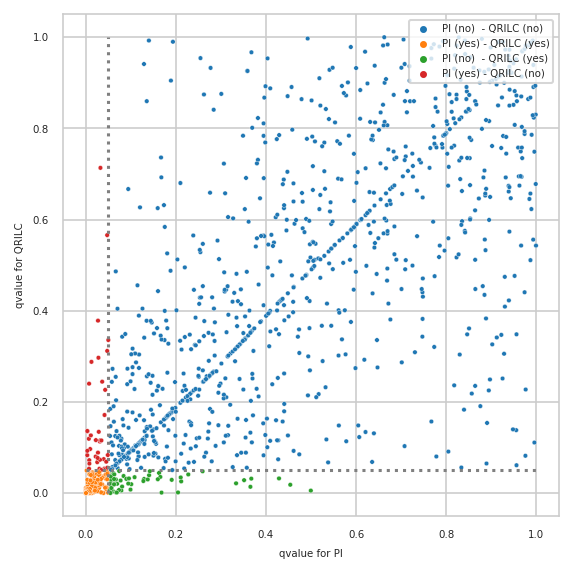

In [20]:
figsize = (4, 4)
size = 5
fig, ax = plt.subplots(figsize=figsize)
x_col = to_plot.columns[0]
y_col = to_plot.columns[1]
ax = sns.scatterplot(data=to_plot,
                     x=x_col,
                     y=y_col,
                     s=size,
                     hue='Differential Analysis Comparison',
                     ax=ax)
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.4,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_1_{args.model_key}'] = (
    args.out_folder /
    f'diff_analysis_comparision_1_{args.model_key}')
fname = files_out[f'diff_analysis_comparision_1_{args.model_key}']
pimmslearn.savefig(fig, name=fname)

- also showing how many features were measured ("observed") by size of circle

pimmslearn.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_QRILC/diff_analysis_comparision_2_QRILC


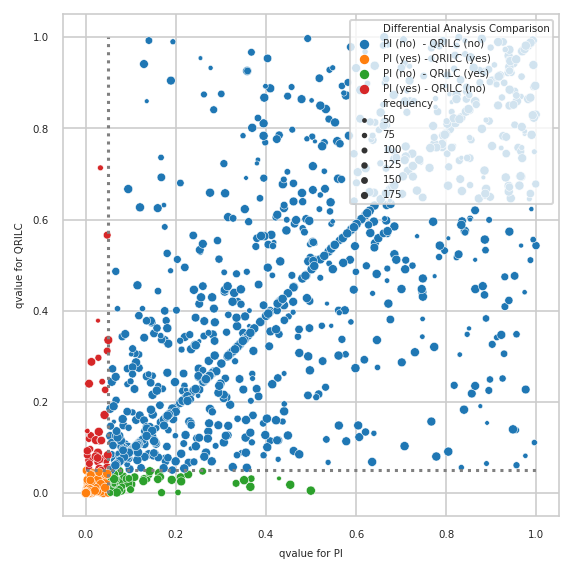

In [21]:
fig, ax = plt.subplots(figsize=figsize)
ax = sns.scatterplot(data=to_plot,
                     x=to_plot.columns[0],
                     y=to_plot.columns[1],
                     size='frequency',
                     s=size,
                     sizes=(5, 20),
                     hue='Differential Analysis Comparison')
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.6,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_2_{args.model_key}'] = (
    args.out_folder / f'diff_analysis_comparision_2_{args.model_key}')
pimmslearn.savefig(
    fig, name=files_out[f'diff_analysis_comparision_2_{args.model_key}'])

## Only features contained in model
- this block exist due to a specific part in the ALD analysis of the paper

In [22]:
scores_model_only = scores.reset_index(level=-1, drop=True)
_diff = scores_model_only.index.difference(scores_common.index)
if not _diff.empty:
    scores_model_only = (scores_model_only
                         .loc[
                             _diff,
                             args.model_key]
                         .sort_values(by='qvalue', ascending=True)
                         .join(freq_feat.squeeze().rename(freq_feat.columns.droplevel()[0])
                               )
                         )
    display(scores_model_only)
else:
    scores_model_only = None
    logger.info("No features only in new comparision model.")

if not _diff.empty:
    scores_model_only.to_excel(writer, 'only_model', **writer_args)
    display(scores_model_only.rejected.value_counts())
    scores_model_only_rejected = scores_model_only.loc[scores_model_only.rejected]
    scores_model_only_rejected.to_excel(
        writer, 'only_model_rejected', **writer_args)

root - INFO     No features only in new comparision model.


## DISEASES DB lookup

Query diseases database for gene associations with specified disease ontology id.

In [23]:
data = pimmslearn.databases.diseases.get_disease_association(
    doid=args.disease_ontology, limit=10000)
data = pd.DataFrame.from_dict(data, orient='index').rename_axis('ENSP', axis=0)
data = data.rename(columns={'name': args.annotaitons_gene_col}).reset_index(
).set_index(args.annotaitons_gene_col)
data

pimmslearn.databases.diseases - WARNING  There are more associations available


,ENSP,score
None,,
PSEN2,ENSP00000355747,5.000
APOE,ENSP00000252486,5.000
PSEN1,ENSP00000326366,5.000
APP,ENSP00000284981,5.000
MAPT,ENSP00000340820,4.800
...,...,...
AP1M2,ENSP00000465685,0.682
CRISPLD2,ENSP00000262424,0.681
PRSS23,ENSP00000280258,0.681


## Shared features
ToDo: new script -> DISEASES DB lookup

In [24]:
feat_name = scores.index.names[0]  # first index level is feature name
if args.annotaitons_gene_col in scores.index.names:
    logger.info(f"Found gene annotation in scores index:  {scores.index.names}")
else:
    logger.info(f"No gene annotation in scores index:  {scores.index.names}"
                " Exiting.")
    import sys
    sys.exit(0)

root - INFO     No gene annotation in scores index:  ['protein groups', 'Source'] Exiting.


SystemExit: 0

/home/runner/work/pimms/pimms/project/.snakemake/conda/6715efd991e76280121d63e6ee52e56e_/lib/python3.12/site-packages/IPython/core/interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [ ]:
gene_to_PG = (scores.droplevel(
    list(set(scores.index.names) - {feat_name, args.annotaitons_gene_col})
)
    .index
    .to_frame()
    .reset_index(drop=True)
    .set_index(args.annotaitons_gene_col)
)
gene_to_PG.head()

In [ ]:
disease_associations_all = data.join(
    gene_to_PG).dropna().reset_index().set_index(feat_name).join(annotations)
disease_associations_all

## only by model

In [ ]:
idx = disease_associations_all.index.intersection(scores_model_only.index)
disease_assocications_new = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new.head(20)

In [ ]:
mask = disease_assocications_new.loc[idx, 'score'] >= 2.0
disease_assocications_new.loc[idx].loc[mask]

## Only by model which were significant

In [ ]:
idx = disease_associations_all.index.intersection(
    scores_model_only_rejected.index)
disease_assocications_new_rejected = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new_rejected.head(20)

In [ ]:
mask = disease_assocications_new_rejected.loc[idx, 'score'] >= 2.0
disease_assocications_new_rejected.loc[idx].loc[mask]

## Shared which are only significant for by model

In [ ]:
mask = (scores_common[(str(args.model_key), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_model = (disease_associations_all.loc[idx].sort_values(
    'score', ascending=False))
disease_assocications_shared_rejected_by_model.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_model.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_model.loc[idx].loc[mask]

## Only significant by RSN

In [ ]:
mask = (scores_common[(str(args.baseline), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_RSN = (
    disease_associations_all
    .loc[idx]
    .sort_values('score', ascending=False))
disease_assocications_shared_rejected_by_RSN.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_RSN.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_RSN.loc[idx].loc[mask]

## Write to excel

In [ ]:
disease_associations_all.to_excel(
    writer, sheet_name='disease_assoc_all', **writer_args)
disease_assocications_new.to_excel(
    writer, sheet_name='disease_assoc_new', **writer_args)
disease_assocications_new_rejected.to_excel(
    writer, sheet_name='disease_assoc_new_rejected', **writer_args)

## Outputs

In [ ]:
writer.close()
files_out